# This notebook shows how to extract a model from a Latex document and simulate the mode. 

## Why specify a model in Latex? 

Sometime the **implementation** of a model in software don't match the **specification** of the model in 
the text in which the model is presented. It can be a chalange to make sure that the specification is 
updated in order to reflect changes made in the implementation. 

By extracting the model from a Latex script which describes and specify the model a one can always be sure that simulations reflect the model as described in the paper. 

Also the author is forced to make a complete specification of the model, else it won't run. 

## The Economic Credit Loss model 
This jupyter notebook is inspired by IMF working paper (WP/20/111) The Expected Credit Loss Modeling from a Top-Down Stress Testing Perspective by Marco Gross, Dimitrios Laliotis, Mindaugas Leika, Pavel Lukyantsau. The working paper and the associated material is located https://www.imf.org/en/Publications/WP/Issues/2020/07/03/Expected-Credit-Loss-Modeling-from-a-Top-Down-Stress-Testing-Perspective-49545

from the abstract of the paper: 
> The objective of this paper is to present an integrated tool suite for IFRS 9- and CECL compatible
estimation in top-down solvency stress tests. The tool suite serves as an
illustration for institutions wishing to include accounting-based approaches for credit risk
modeling in top-down stress tests.

This is a jupyter notebook build with the purpose of illustrating the conversion of a model from Latex to ModelFlow. The purpose is testing so take very much care.  

## Import libraries 

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex
import numpy as np

from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'precision', 2)
sortdf = lambda df: df[sorted([c for c in df.columns])]

## Fetch the precooked model and baseline 
The model and data has been specified in another Jupyter notebook: 

[file/Model for economic credit loss with Z score transition nynamic - setup]

In [2]:
ecl,baseline  = model.modelload('ecl.pcim')

## Input values for the adverse scenario

In [17]:
%%dataframe projection_adverse nshow
LOAN_GROWTH	M_S1	M_S2	WRO_S3	Z
0	1.00e-02	0.04	0.03	0.06	0.00
1	-1.00e-02	0.04	0.03	0.06	-0.65
2	-8.00e-03	0.04	0.03	0.06	-0.84
3	-6.00e-03	0.04	0.03	0.06	-0.99
4	-4.00e-03	0.04	0.03	0.06	-0.69
5	-2.00e-03	0.04	0.03	0.06	-0.39
6	-0.00e+00	0.04	0.03	0.06	-0.24

## Create a $\Delta$scenario Dataframe

In [4]:
projection_baseline = baseline.loc[projection_adverse.index,projection_adverse.columns] 
scenario_delta = projection_adverse-projection_baseline
scenario_delta

,LOAN_GROWTH,M_S1,M_S2,WRO_S3,Z
0,0.00,-0.01,-8.00e-03,-0.01,0.00
1,-0.02,-0.01,-8.00e-03,-0.01,-0.18
2,-0.02,-0.01,-8.00e-03,-0.01,-0.42
3,-0.02,-0.01,-8.00e-03,-0.01,-0.61
4,-0.01,-0.01,-8.00e-03,-0.01,-0.33
5,-0.01,-0.01,-8.00e-03,-0.01,-0.05
6,-0.01,-0.01,-8.00e-03,-0.01,0.09


## Run the model for different severities 

In [12]:
ecl.keep_solutions={}
for severity in np.arange(0, 2.001, 0.2):
    print(f'severity {severity:.1f}')
    adverse = baseline.copy()
    adverse.update(projection_baseline + severity * scenario_delta)
    adverse_result = ecl(adverse,keep = f'Severity: {severity:.1f}',silent=1)

severity 0.0
severity 0.2
severity 0.4
severity 0.6
severity 0.8
severity 1.0
severity 1.2
severity 1.4
severity 1.6
severity 1.8
severity 2.0


### Loan growth

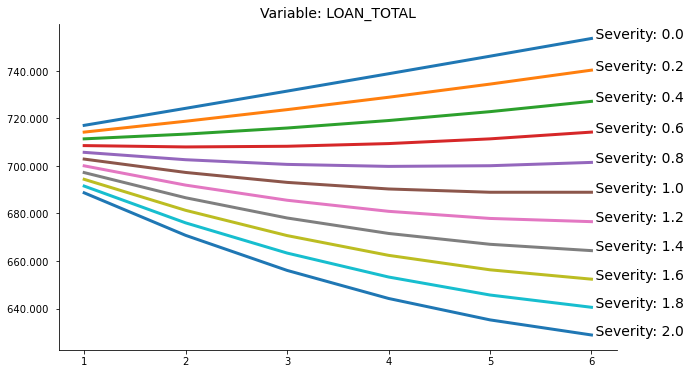

In [13]:
ecl.keep_plot('loan_total',showtype='level',legend=0);

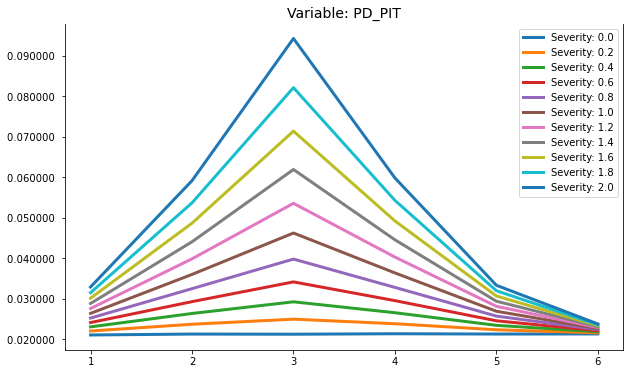

In [14]:
ecl.keep_plot('pd_pit',showtype='level',legend=1);

### Transition probabilities 

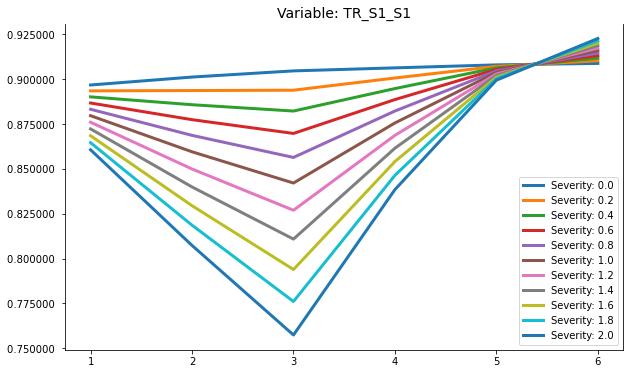

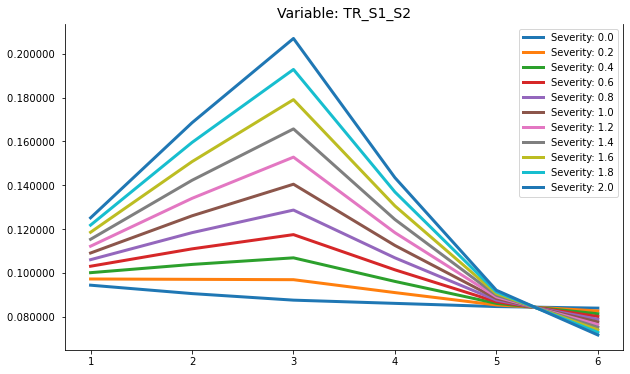

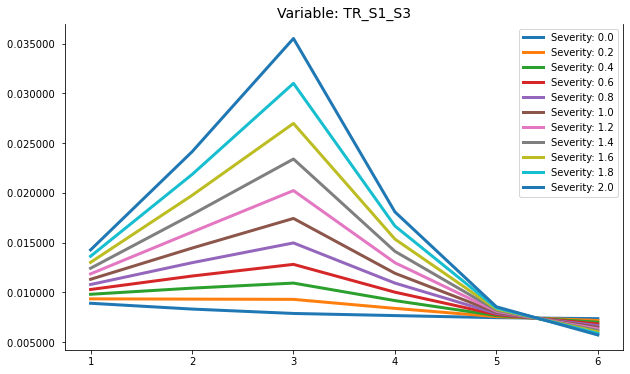

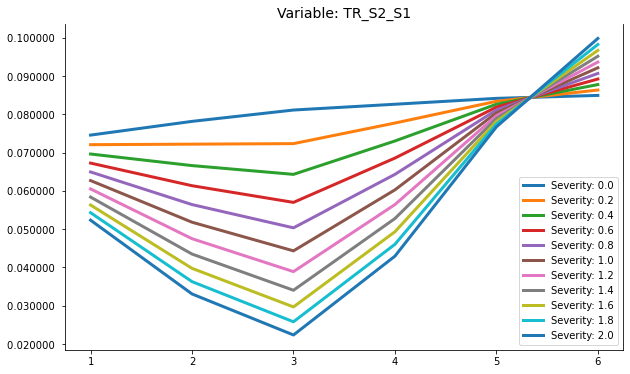

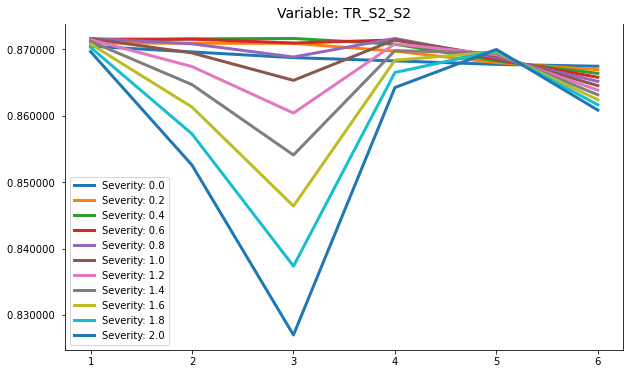

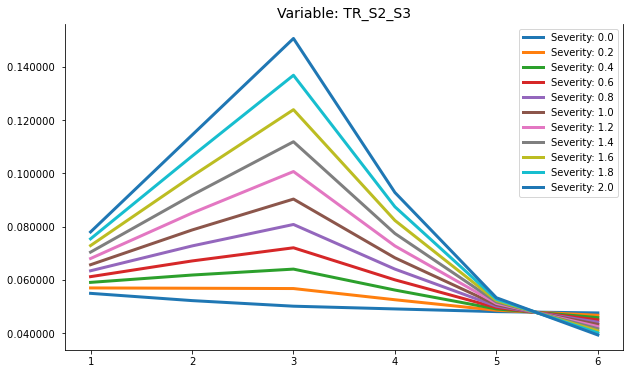

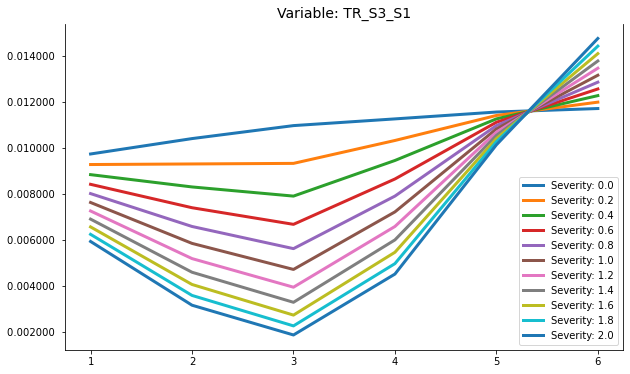

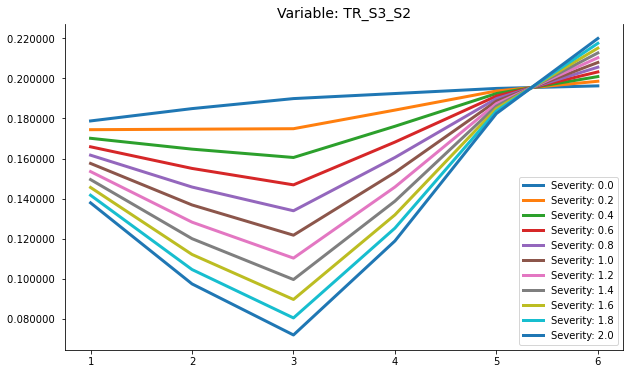

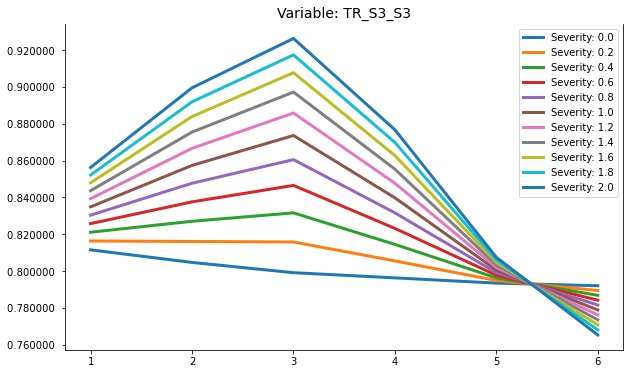

In [16]:
ecl.keep_plot('tr_*',showtype='level',legend=True);

## Or use an interactive inspector

In [20]:
ecl.keep_viz('loan_total')

Output()